In [0]:
#консольные команды для Google Colab по установке Selenium и драйвера Chromium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [968 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [749 kB]
Get:14 http://security.ubuntu.com/ubuntu bionic-security InRelease [88

In [0]:
#запускаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from selenium import webdriver

options = webdriver.ChromeOptions()

In [0]:
#пришлось принять меры предосторожности, чтобы Selenium не крашнулся в Google Colab, если вы пользуетесь чем-то другим, можете не активировать
import os
try:
  os.mkdir('/usr/dwn')
except FileExistsError:
  pass
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-extenstions')
options.add_argument('download.default_directory=/usr/dwn') 


In [0]:
bwr = webdriver.Chrome('chromedriver', options=options)
bwr.get('http://rgho.st/76Rym8rzS')
bwr.find_element_by_link_text('Скачать').click()

In [0]:
#если Selenium с вашей системой не сдружился 
#например, не выкачивает файл, потому что директория нестандартная
#поступим проще и выкачаем с гитхаба

url = 'https://raw.githubusercontent.com/anoninnes/project/master/movie-data.csv'
df = pd.read_csv(url)

In [101]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [102]:
#оценим масштабы датасета
df.shape  

(10866, 21)

In [103]:
# проверяем, не побились ли данные
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [104]:
# смотрим на количество объектов в каждой категории
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [105]:
# подгрузим статистику
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [106]:
#ищем пустоты
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [0]:
# почистим данные 
df.drop(['id','imdb_id', 'homepage','overview'],axis=1,inplace=True)

df['cast'].fillna('nodata',inplace=True)
df['director'].fillna('nodata',inplace=True)
df['tagline'].fillna('nodata',inplace=True)
df['keywords'].fillna('nodata',inplace=True)
df['genres'].fillna('nodata',inplace=True)
df['production_companies'].fillna('nodata',inplace=True) 
df['budget'] = df['budget'].replace(0, np.nan) 

In [136]:
# проверим, почистилось ли
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [0]:
df.duplicated().sum()


In [137]:
df.drop_duplicates(inplace=True) 
df.duplicated().sum()  

0

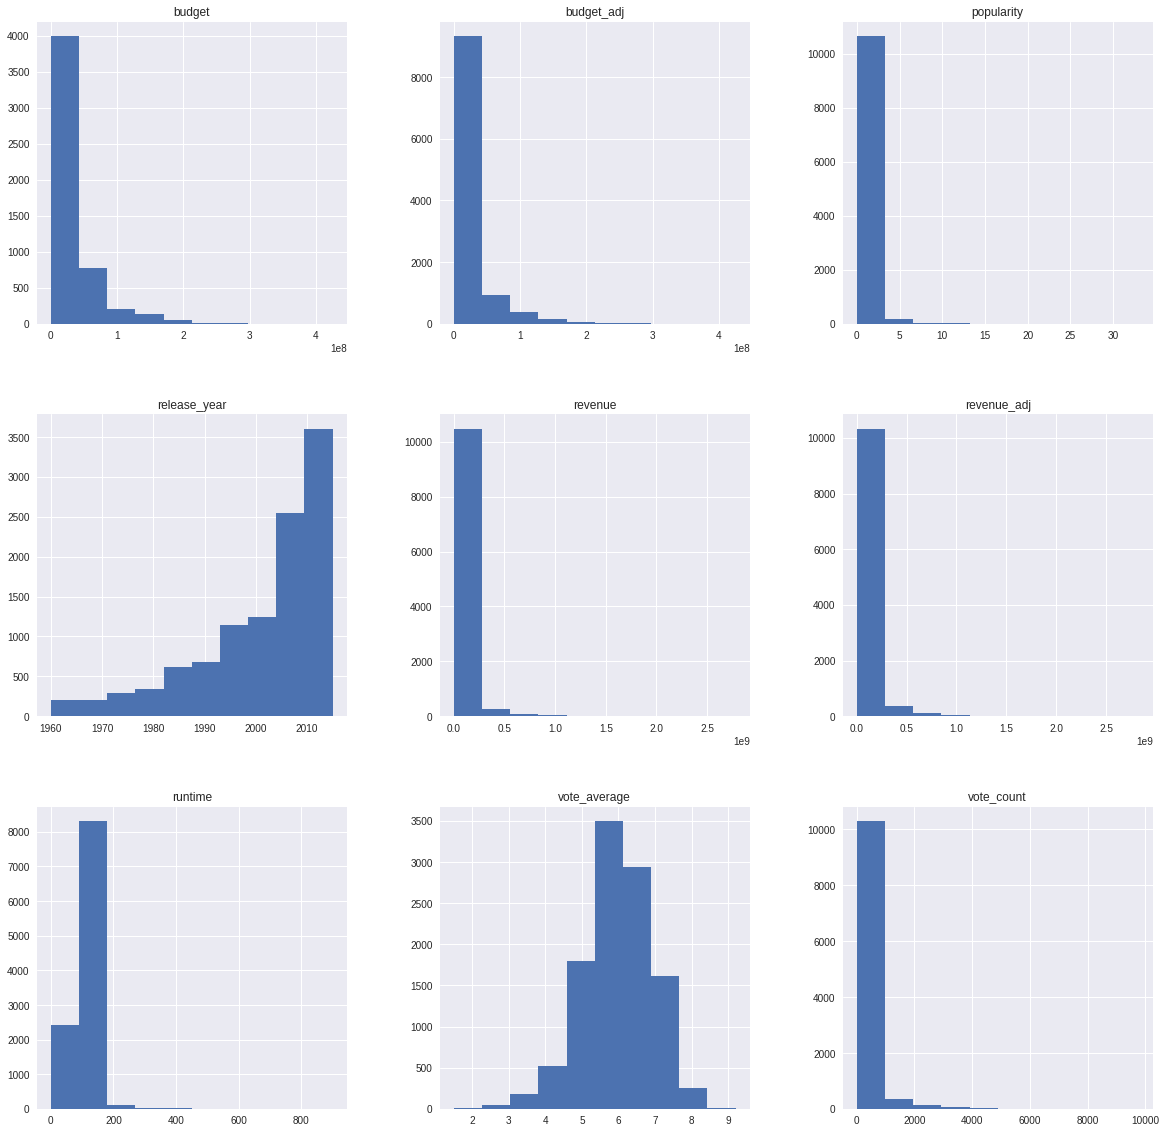

In [138]:
# давайте визуализируем это дело 
df.hist(figsize=(20,20));

0        150000000.0
1        150000000.0
2        110000000.0
3        200000000.0
4        190000000.0
5        135000000.0
6        155000000.0
7        108000000.0
8         74000000.0
9        175000000.0
10       245000000.0
11       176000003.0
12        15000000.0
13        88000000.0
14       280000000.0
15        44000000.0
16        48000000.0
17       130000000.0
18        95000000.0
19       160000000.0
20       190000000.0
21        30000000.0
22       110000000.0
23        40000000.0
24        28000000.0
25       150000000.0
26        68000000.0
27        81000000.0
28        20000000.0
29        61000000.0
            ...     
10836            NaN
10837            NaN
10838            NaN
10839            NaN
10840            NaN
10841        75000.0
10842            NaN
10843            NaN
10844            NaN
10845            NaN
10846            NaN
10847            NaN
10848      5115000.0
10849            NaN
10850            NaN
10851            NaN
10852        

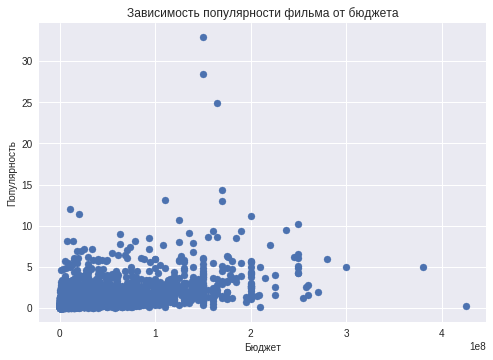

In [139]:
# давайте поищем, есть ли между популярностью и бюджетом связь
x = df['budget']
y = df['popularity'] 

plt.scatter(x,y)
plt.title('Зависимость популярности фильма от бюджета',fontsize=12)
plt.xlabel('Бюджет',fontsize=10)
plt.ylabel('Популярность',fontsize=10)

print(x)

17000000.0


Text(0, 0.5, 'Average Popularity')

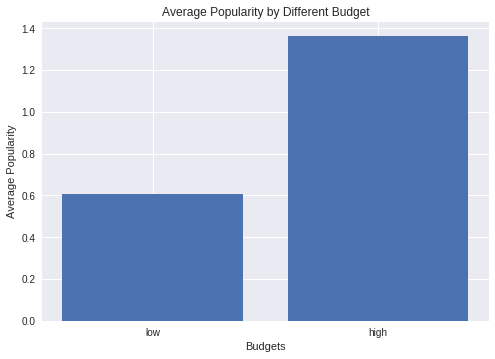

In [142]:
# поделим на половины с низким и высоким бюджетами и проверим, насколько они в среднем популярны
m = x.median()
print(m)
low_budg = df.query('budget < {}'.format(m))
high_budg = df.query('budget >= {}'.format(m))
mean_popularity_of_low_budget = low_budg['popularity'].mean()
mean_popularity_of_high_budget = high_budg['popularity'].mean()
locations = [1,2]
heights = [mean_popularity_of_low_budget , mean_popularity_of_high_budget]
labels=['низкий','высокий']
plt.bar(locations, heights, tick_label = labels)
plt.title('Популярность от бюджета')
plt.xlabel('Бюджет')
plt.ylabel('Популярность')

In [145]:
# найдём, на сколько процентов высокобюджетные в среднем популярнее низкобюджетных
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
print(increase_percentage)

55.50933772947093


Q2: What length will receive the highest popularity? 

Text(0, 0.5, 'Популярность')

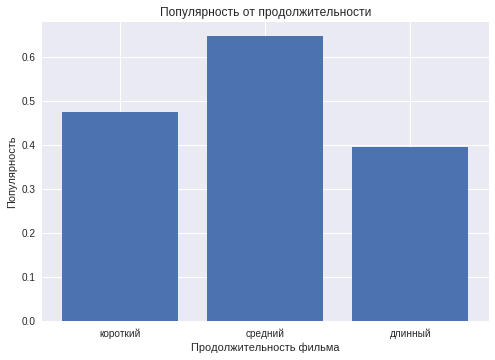

In [147]:
short =  df.query('runtime < {}'.format(100))
medium =  df.query('runtime < {}'.format(200))
long = df.query('runtime > {}'.format(200))
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = long['popularity'].mean()
locations = [1,2,3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels=['короткий','средний','длинный']
plt.bar(locations, heights, tick_label = labels)
plt.title('Популярность от продолжительности')
plt.xlabel('Продолжительность фильма')
plt.ylabel('Популярность')

Text(0, 0.5, 'Популярность')

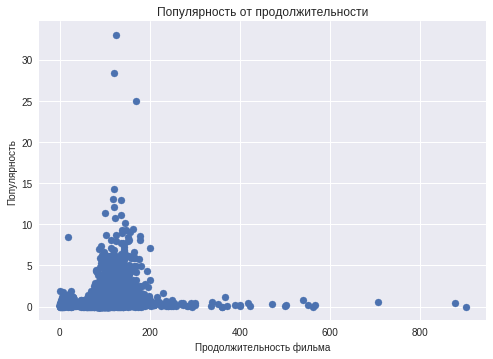

In [149]:
# нарисуем теперь scatter plot 
x = df['runtime']
y = df['popularity'] 

plt.scatter(x,y)

plt.title('Популярность от продолжительности',fontsize=12)
plt.xlabel('Продолжительность фильма',fontsize=10)
plt.ylabel('Популярность',fontsize=10)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb00fcd160>,
      dtype=object)

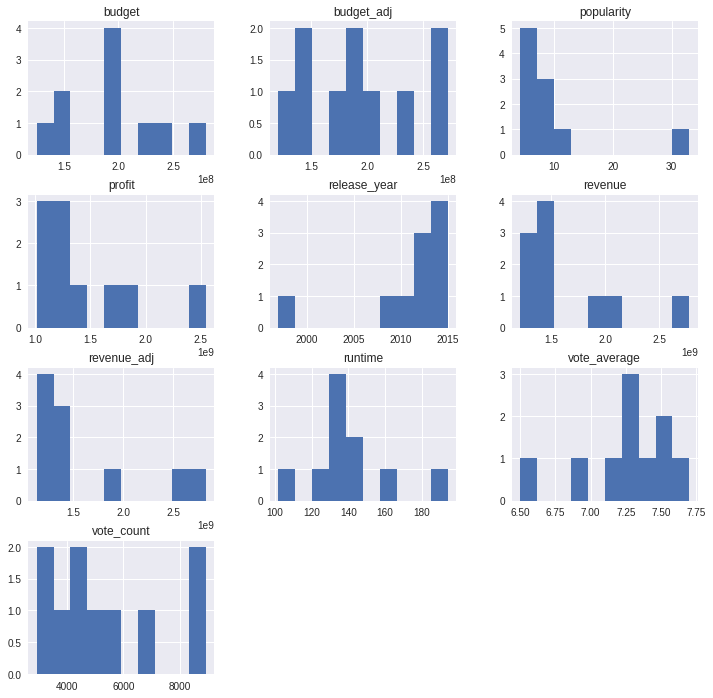

In [153]:
top10_revenue = df.nlargest(10,'revenue')
top10_revenue.hist(figsize=(12,12))

In [0]:
def extract_data(column_name):
    data = df[column_name].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)


In [159]:
genre_count = extract_data('genres')

df_genre_counts = pd.DataFrame({'genres': genre_count.index, 'count': genre_count.values }) 

f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'count', y = 'genres', data=df_genre_counts)
ax.set_title('Появления на жанр')
ax.set_xlabel('Появления')
ax.set_ylabel('жанры')
plt.show()


AttributeError: ignored

In [0]:
director_count = extract_data('director')
director_count

Text(0, 0.5, 'number of movies')

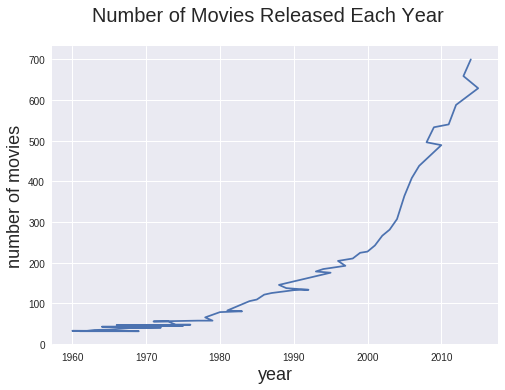

In [162]:
movie_count = df['release_year'].value_counts()
# movie_count.plot(xlabel='year',ylabel='number of movies',title='Number of Movies Released Each Year')
fig = plt.figure()
plt.plot(movie_count)
fig.suptitle('Число фильмов в году',fontsize=20)
plt.xlabel('Год',fontsize=18)
plt.ylabel('Число',fontsize=18)

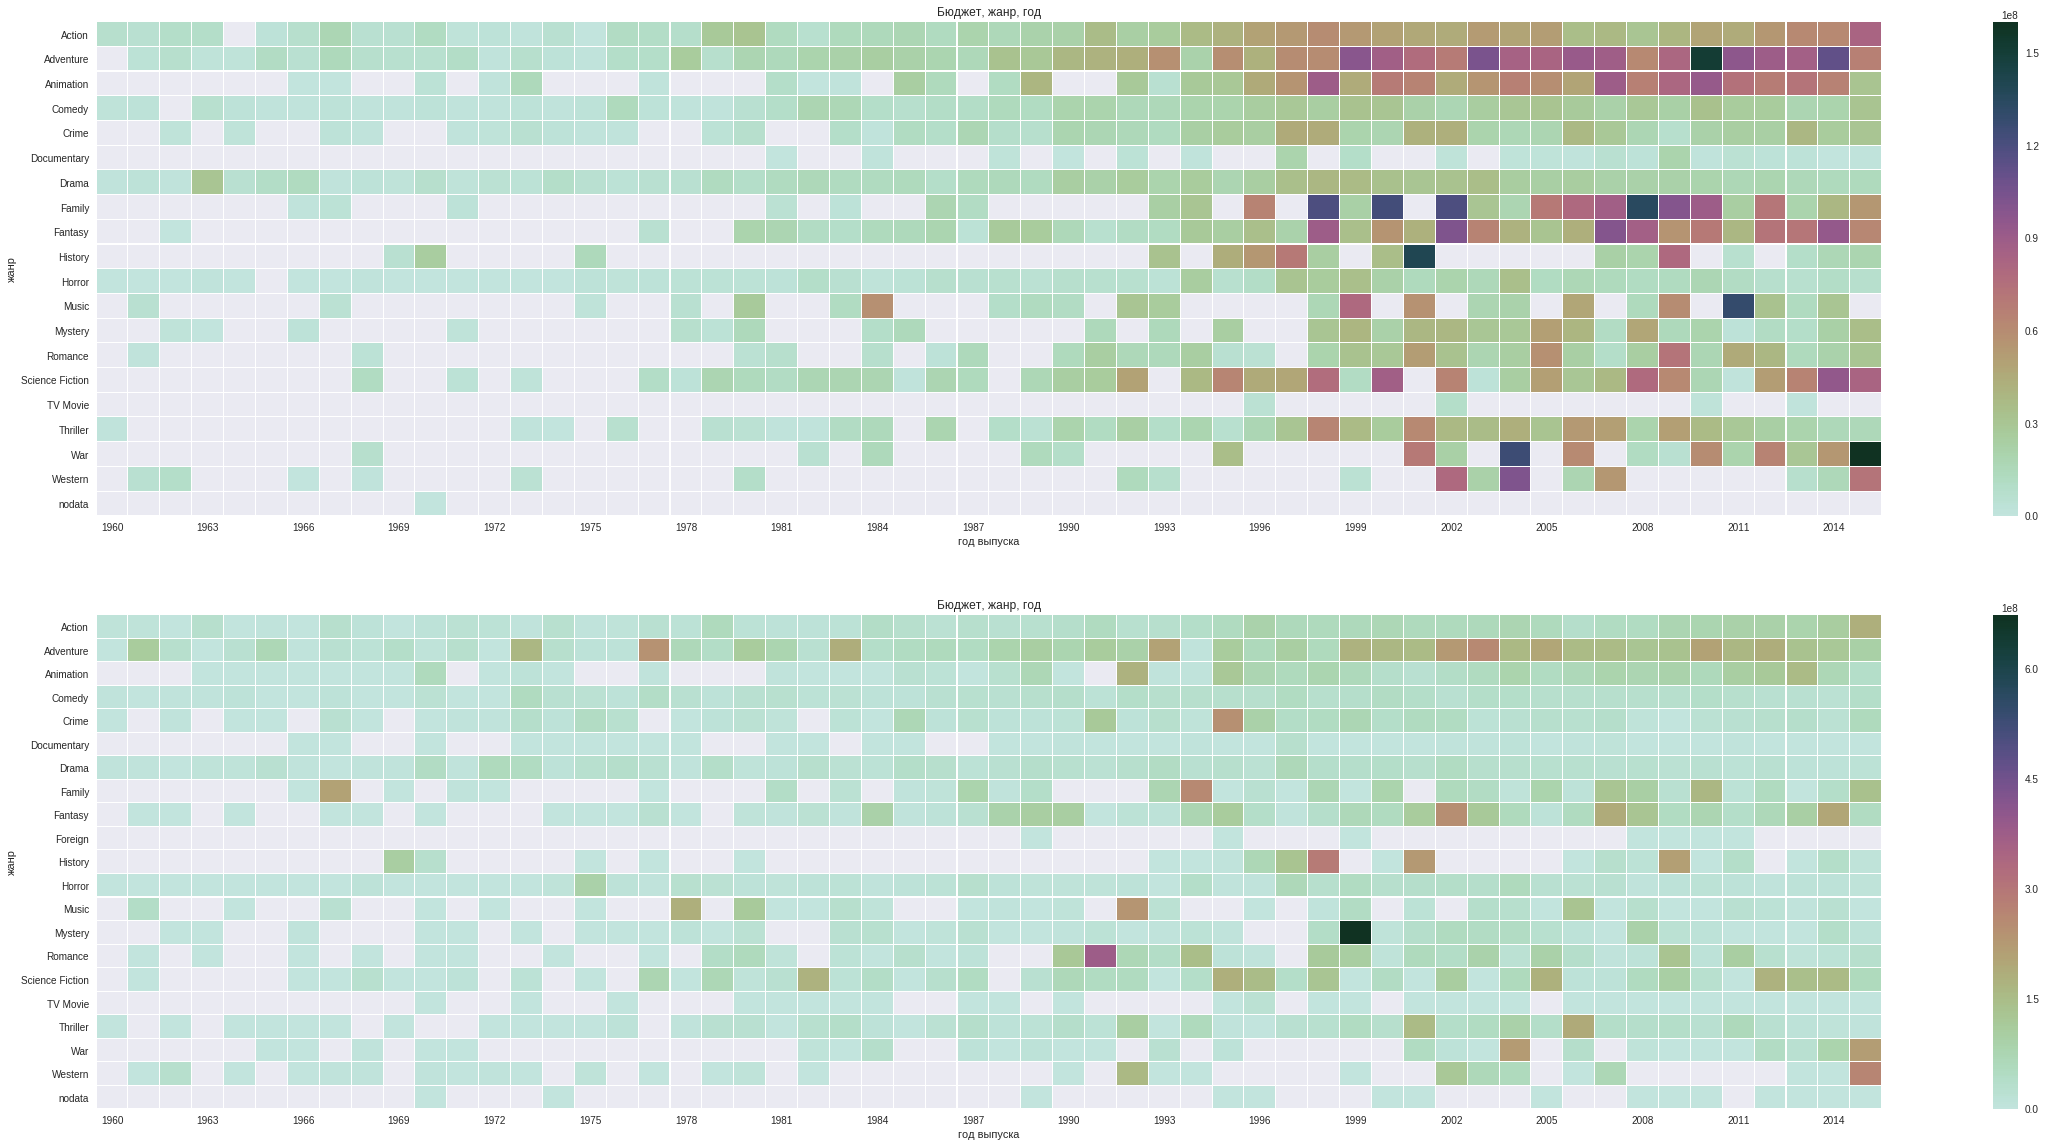

In [164]:
df['genre'] =  df['genres'].apply(lambda x: x.split('|')[0])

genre_year = df.groupby(['genre', 'release_year']).mean().sort_index()
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)


df_gyGross = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='revenue', aggfunc=np.mean)
f, [axA, axB] = plt.subplots(figsize=(40, 20), nrows=2)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
sns.heatmap(df_gyBudget, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axA)
sns.heatmap(df_gyGross, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axB)
axA.set_title('Бюджет, жанр, год')
axA.set_xlabel('год выпуска')
axA.set_ylabel('жанр')


axB.set_title('Бюджет, жанр, год')
axB.set_xlabel('год выпуска')
axB.set_ylabel('жанр')
plt.show()

